In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

**Importing and cleaning the data:**

In [2]:
content_data = pd.read_csv('Content.csv')
reaction_data = pd.read_csv('Reactions.csv')
rtype_data = pd.read_csv('ReactionTypes.csv')

In [3]:
content_data.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
reaction_data.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
rtype_data.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


**Fixing the index, removing rows with empty data, and making data types appropriate:**

In [6]:
content_data.drop('Unnamed: 0', axis = 1,inplace = True)
content_data.dropna(axis = 0, inplace = True)
content_data.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
reaction_data.drop('Unnamed: 0', axis = 1,inplace = True)
reaction_data.dropna(axis = 0, inplace = True)
reaction_data.head()

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [8]:
rtype_data.drop('Unnamed: 0', axis = 1,inplace = True)
rtype_data.dropna(axis = 0, inplace = True)
rtype_data.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [9]:
reaction_data['Datetime'] = pd.to_datetime(reaction_data['Datetime'], yearfirst= True)

In [10]:
reaction_data['Datetime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 22534 entries, 1 to 25552
Series name: Datetime
Non-Null Count  Dtype         
--------------  -----         
22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 352.1 KB


In [11]:
rtype_data['Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16 entries, 0 to 15
Series name: Score
Non-Null Count  Dtype
--------------  -----
16 non-null     int64
dtypes: int64(1)
memory usage: 256.0 bytes


**Removing unnecessary columnsand renaming them for clarity:**

In [12]:
content_data.drop('URL',axis=1,inplace=True)

In [13]:
content_data.head()

,Content ID,User ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [14]:
content_data['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'dogs',
       'soccer', 'public speaking', 'tennis', 'travel', 'education',
       'studying', 'science', 'veganism', 'cooking', 'animals', 'fitness',
       'culture'], dtype=object)

In [15]:
content_data['Content Type'] = content_data['Type']
content_data.drop('Type', axis = 1,inplace = True)
content_data.head()

,Content ID,User ID,Category,Content Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,Studying,photo
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,healthy eating,photo
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,healthy eating,photo
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,technology,photo
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,food,video


In [16]:
content_data.drop('User ID', axis = 1,inplace = True)
reaction_data.drop('User ID', axis = 1,inplace = True)

In [17]:
content_data.head()

,Content ID,Category,Content Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,photo
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating,photo
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating,photo
3,356fff80-da4d-4785-9f43-bc1261031dc6,technology,photo
4,01ab84dd-6364-4236-abbb-3f237db77180,food,video


In [18]:
reaction_data.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [19]:
rtype_data.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


**Merging the data sets:**

In [20]:
cleaned_dataset = pd.merge(reaction_data,content_data)
cleaned_dataset.head()

,Content ID,Type,Datetime,Category,Content Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,photo
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,Studying,photo
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,Studying,photo
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,photo
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,Studying,photo


In [21]:
len(cleaned_dataset['Type'].unique())

16

In [22]:
len(rtype_data['Type'].unique())

16

In [23]:
cleaned_dataset = pd.merge(cleaned_dataset,rtype_data)

In [24]:
cleaned_dataset.head()

,Content ID,Type,Datetime,Category,Content Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,photo,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,photo,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,photo,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,photo,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,photo,negative,0


**Calculating the top 5 Categories by Score:**

In [25]:
cleaned_dataset['Category'].str.lower().head()

0          studying
1          studying
2          studying
3    healthy eating
4    healthy eating
Name: Category, dtype: object

In [26]:
np.sum(cleaned_dataset[cleaned_dataset['Category'].str.lower() == 'studying']['Score'])

35861

In [27]:
cat_list = ['studying', 'healthy eating', 'dogs', 'public speaking', 'tennis',
       'food', 'soccer', 'education', 'travel', 'science',
       'veganism', 'cooking', 'technology', 'animals', 'fitness',
       'culture']

len(cat_list)

16

In [28]:
score_list = []
for i in cat_list:
    new_score = np.sum(cleaned_dataset[cleaned_dataset['Category'].str.lower() == i]['Score'])
    
    score_list.append(new_score)
    
    print(f"Category: {i} | Score: {new_score}")

Category: studying | Score: 35861
Category: healthy eating | Score: 52745
Category: dogs | Score: 41816
Category: public speaking | Score: 37730
Category: tennis | Score: 43612
Category: food | Score: 47576
Category: soccer | Score: 42031
Category: education | Score: 45103
Category: travel | Score: 53935
Category: science | Score: 53657
Category: veganism | Score: 38513
Category: cooking | Score: 49681
Category: technology | Score: 46683
Category: animals | Score: 52443
Category: fitness | Score: 41829
Category: culture | Score: 47710


In [29]:
print(score_list,'\n')
print(cat_list)

print(len(score_list),'\n')
print(len(cat_list))


[35861, 52745, 41816, 37730, 43612, 47576, 42031, 45103, 53935, 53657, 38513, 49681, 46683, 52443, 41829, 47710] 

['studying', 'healthy eating', 'dogs', 'public speaking', 'tennis', 'food', 'soccer', 'education', 'travel', 'science', 'veganism', 'cooking', 'technology', 'animals', 'fitness', 'culture']
16 

16


In [30]:
sco_per_cat = {k:v for k,v in zip(cat_list,score_list)}

print(sco_per_cat)

{'studying': 35861, 'healthy eating': 52745, 'dogs': 41816, 'public speaking': 37730, 'tennis': 43612, 'food': 47576, 'soccer': 42031, 'education': 45103, 'travel': 53935, 'science': 53657, 'veganism': 38513, 'cooking': 49681, 'technology': 46683, 'animals': 52443, 'fitness': 41829, 'culture': 47710}


In [31]:
top_5 = pd.DataFrame.from_dict(data = sco_per_cat, orient='index',
                       columns=['Scores'])

top_5 = top_5.sort_values(by='Scores',ascending = False).head(5)

In [32]:
top_5.reset_index(inplace = True)
top_5.head()

,index,Scores
0,travel,53935
1,science,53657
2,healthy eating,52745
3,animals,52443
4,cooking,49681


In [33]:
top_5.columns

Index(['index', 'Scores'], dtype='object')

**Writing the Cleaned data dataframe into excel and the writing the top 5 scoring categories dataframe into excel:**

In [34]:
writer = pd.ExcelWriter("Cleaned_Data_and_Top_5.xlsx")

In [35]:
# Write each dataframe to a different worksheet.
cleaned_dataset.to_excel(writer, sheet_name="Sheet1")
top_5.to_excel(writer, sheet_name="Sheet2")

# Close the Pandas Excel writer and output the Excel file.
writer.close()

**Visualizing the Data:**

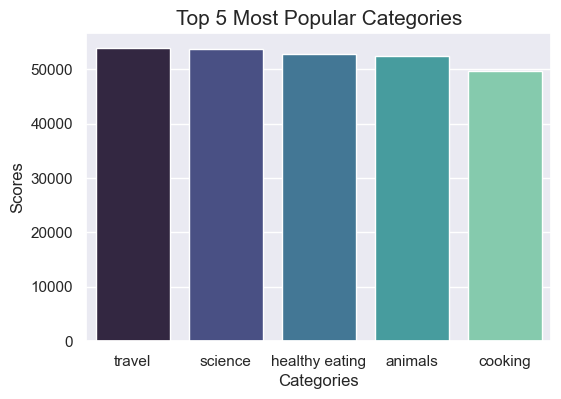

In [36]:
plt.figure(figsize = (6,4))
plt.title('Top 5 Most Popular Categories', fontsize = 15)
sns.barplot(data = top_5,x = 'index', y = 'Scores', palette = 'mako')
plt.xlabel('Categories')
plt.ylabel('Scores')
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

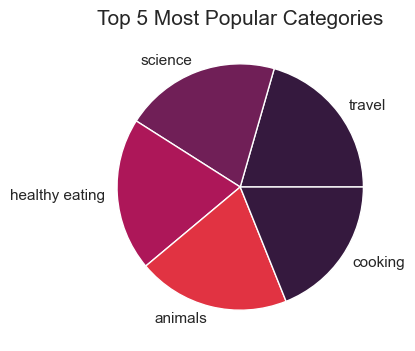

In [37]:
plt.figure(figsize = (6,4))
plt.title('Top 5 Most Popular Categories', fontsize = 15)
colors = sns.color_palette('rocket')[0:4]
plt.pie(x=top_5['Scores'],labels = top_5['index'], colors = colors)


plt.show()

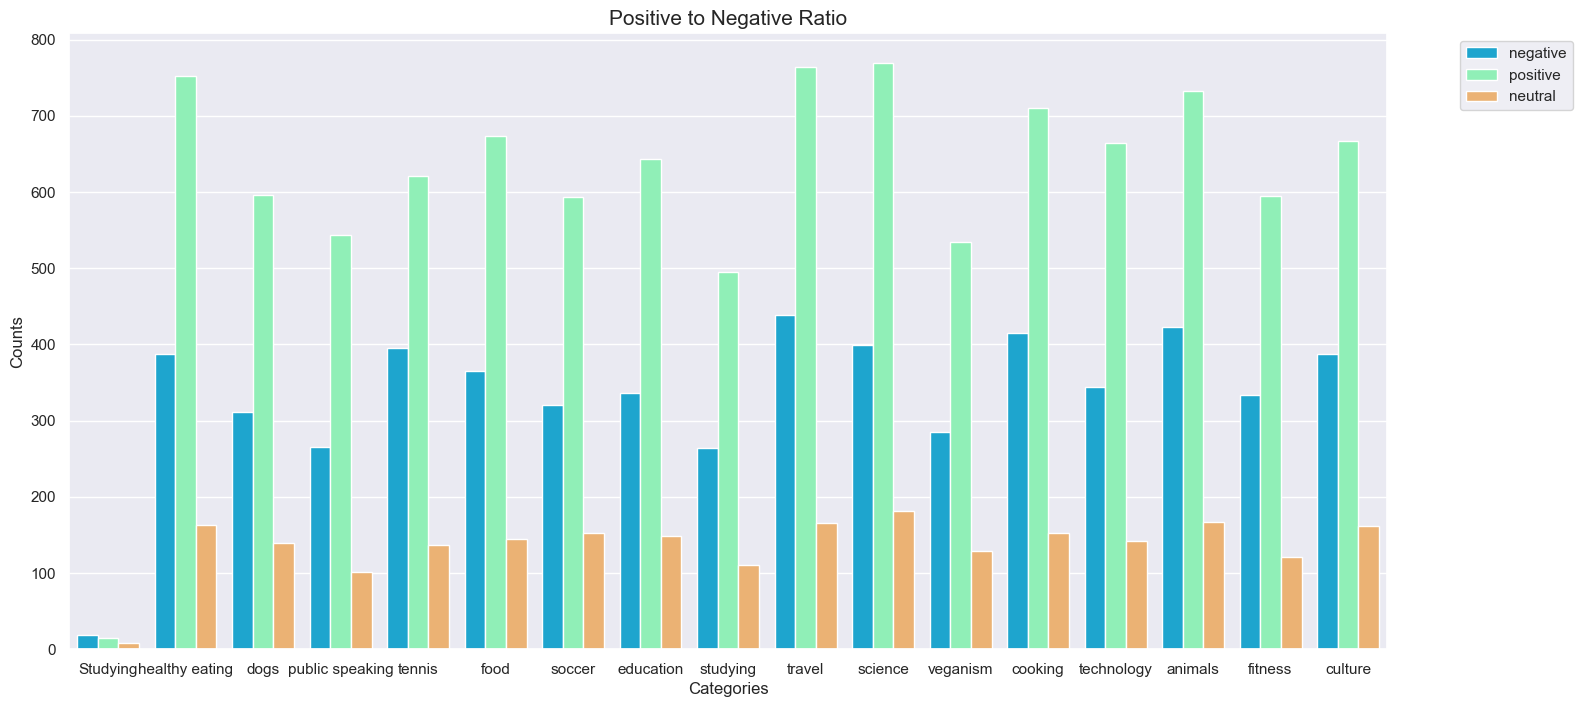

In [38]:
plt.figure(figsize = (17,8))
plt.title('Positive to Negative Ratio', fontsize = 15)
sns.countplot(data = cleaned_dataset, x = 'Category', hue = 'Sentiment', palette = 'rainbow')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

<Axes: xlabel='Content Type', ylabel='count'>

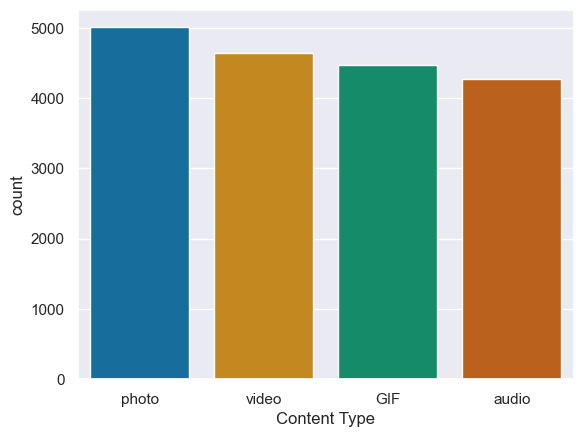

In [39]:
sns.countplot(data = cleaned_dataset, x= 'Content Type', palette = 'colorblind')

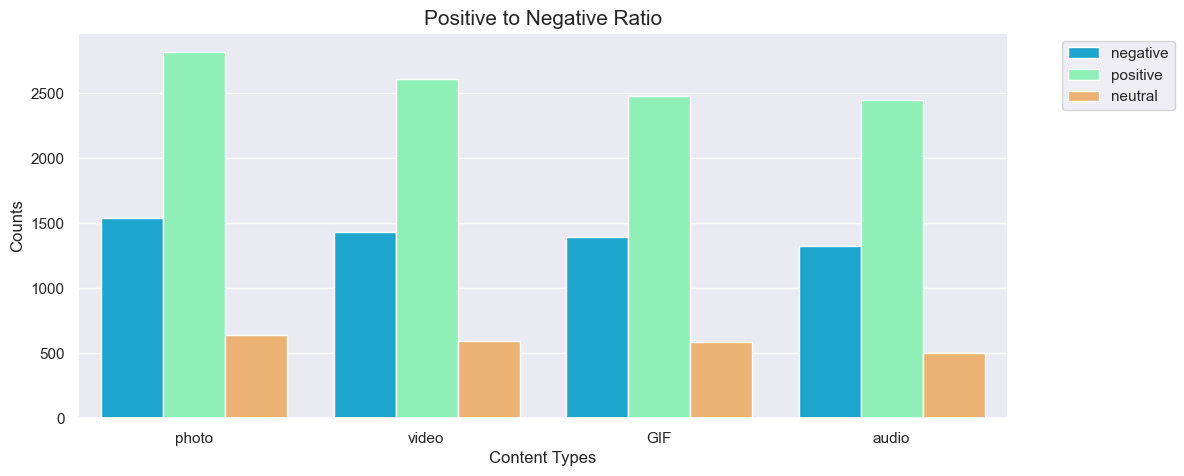

In [40]:
plt.figure(figsize = (12,5))
plt.title('Positive to Negative Ratio', fontsize = 15)
sns.countplot(data = cleaned_dataset, x = 'Content Type', hue = 'Sentiment', palette = 'rainbow')
plt.xlabel('Content Types')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [41]:
by_content = cleaned_dataset.groupby(['Content Type','Sentiment']).count()['Score'].unstack()

In [42]:
by_content.head()

Sentiment,negative,neutral,positive
Content Type,,,
GIF,1393,588,2484
audio,1322,501,2453
photo,1543,640,2823
video,1432,595,2610


<Axes: title={'center': 'Heatmap of Scores'}, xlabel='Sentiment', ylabel='Content Type'>

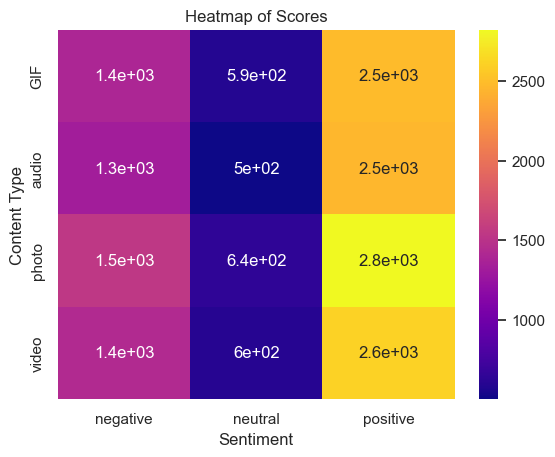

In [43]:
plt.title('Heatmap of Scores')
sns.heatmap(data = by_content, annot = True,cmap = 'plasma')

Text(0, 0.5, 'count')

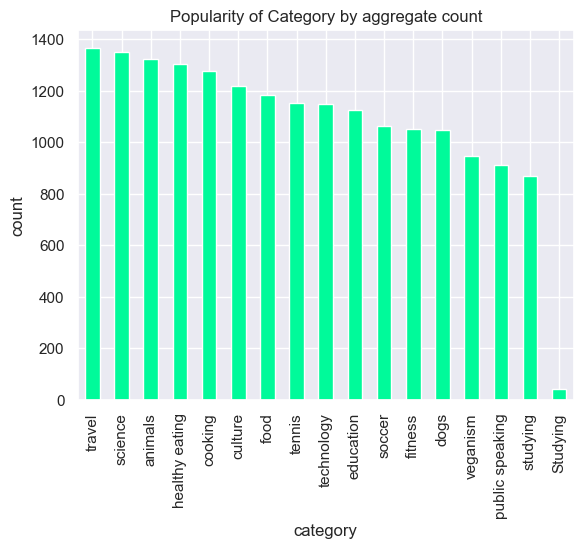

In [44]:
cleaned_dataset['Category'].value_counts().plot(kind = 'bar', color = 'mediumspringgreen')
plt.title('Popularity of Category by aggregate count')
plt.xlabel('category')
plt.ylabel('count')